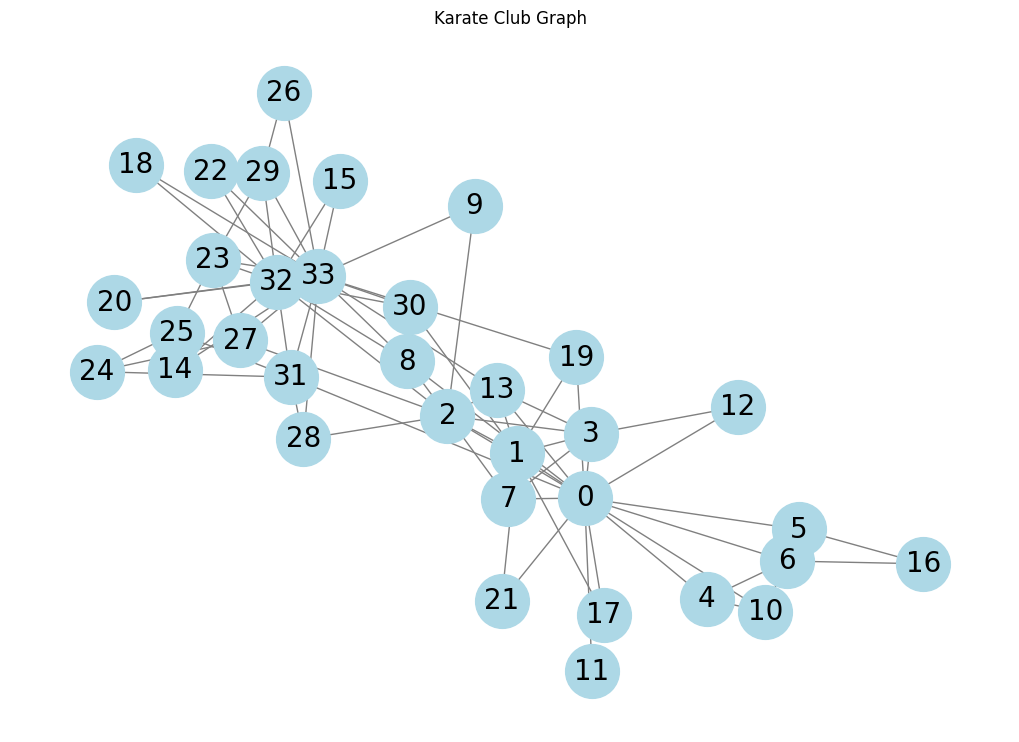

(34, 78, 4.588235294117647)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the karate club dataset
G = nx.karate_club_graph()

# Visualize the dataset
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=20)
plt.title("Karate Club Graph")
plt.show()

# Calculate basic statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes

num_nodes, num_edges, avg_degree


In [2]:
from sklearn.preprocessing import StandardScaler

# Extract node-based features
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create a feature matrix
features = [
    [degree_centrality[node], betweenness_centrality[node], closeness_centrality[node]]
    for node in G.nodes()
]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features


array([[ 2.98709092,  4.25347412,  2.00616951],
       [ 1.15480319,  0.10730639,  0.82809485],
       [ 1.41655858,  1.07680345,  1.87039142],
       [ 0.36953702, -0.3468332 ,  0.53938359],
       [-0.41572915, -0.46870049, -0.66413306],
       [-0.15397376, -0.15148496, -0.602033  ],
       [-0.15397376, -0.15148496, -0.602033  ],
       [-0.15397376, -0.47552233,  0.19036376],
       [ 0.10778163,  0.12881142,  1.25514691],
       [-0.67748454, -0.46636157,  0.10884926],
       [-0.41572915, -0.46870049, -0.66413306],
       [-0.93923993, -0.47552233, -0.84215323],
       [-0.67748454, -0.47552233, -0.78414666],
       [ 0.10778163,  0.02006805,  1.25514691],
       [-0.67748454, -0.47552233, -0.78414666],
       [-0.67748454, -0.47552233, -0.78414666],
       [-0.67748454, -0.47552233, -1.99928435],
       [-0.67748454, -0.47552233, -0.72482176],
       [-0.67748454, -0.47552233, -0.78414666],
       [-0.41572915, -0.12460367,  1.03515039],
       [-0.67748454, -0.47552233, -0.784

In [3]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Clustering using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iso_forest.fit_predict(scaled_features)

# Convert anomalies labels: -1 (anomaly) becomes True, 1 (normal) becomes False
anomalies = [True if x == -1 else False for x in anomalies]

clusters, anomalies


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32),
 [True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, clusters, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n\n    accuracy                           1.00         7\n   macro avg       1.00      1.00      1.00         7\nweighted avg       1.00      1.00      1.00         7\n')

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert feature matrix and clusters to DataFrame
data = pd.DataFrame(scaled_features, columns=['Degree_Centrality', 'Betweenness_Centrality', 'Closeness_Centrality'])
data['Cluster'] = clusters

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)


In [7]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.8 MB/s eta 0:00:00


In [8]:
import sweetviz as sv

# Analyzing the training data and comparing it with test data
report = sv.compare([train, 'Training Data'], [test, 'Test Data'])

# Generate the report
report.show_html('Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=b288d8692ec4aa8a4b685d29088f1009d1faeab2e8e7b76a41b2bd89f75cd6d6
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [11]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Convert pandas DataFrame to H2O Frame
h2o_train = h2o.H2OFrame(train)
h2o_test = h2o.H2OFrame(test)

# Define predictor and response variables
x = h2o_train.columns[:-1]  # All columns except 'Cluster'
y = 'Cluster'

# Run AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=42)
aml.train(x=x, y=y, training_frame=h2o_train)

# Get the leaderboard of models
lb = aml.leaderboard
print(lb)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2b_3yv_3
  JVM stdout: /tmp/tmp2b_3yv_3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2b_3yv_3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_hvqcm7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:24:07.949: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
19:24:14.204: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


19:24:16.865: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
19:24:16.867: _min_rows param, The dataset size is too small to split for min_rows=100.0: